## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [99]:
import pandas as pd
import numpy as np
import numpy.random as npr
npr.seed(1234)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
! cd \Users\media\Documents\GitHub\LaboratoryOfComputationalPhysics_Y4


In [3]:
df = pd.read_csv('~\data_000637.txt', nrows= 10000)
df


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


In [17]:
#2 
#ORBIT_CNT is increased every 'x' BX_COUNTER
x_value = df['BX_COUNTER'].max() + 1 
print(f"The number of BX_COUNTER in a ORBIT_CNT is {x_value }")

The number of BX_COUNTER in a ORBIT is 3564


In [6]:
df1 =sum(df['ORBIT_CNT']) 
df2 =sum(df['BX_COUNTER']) 
df3 =sum(df['TDC_MEAS']) 
total_sum= df1 + df2 + df3
total_sum #READ ABOUT TIME TO CONVERT THE TOTAL

38692020417821

In [7]:
total_sum= df.iloc[:, 3:6].sum(axis=0)
total_sum

ORBIT_CNT     38692002168169
BX_COUNTER          18115873
TDC_MEAS              133779
dtype: int64

In [20]:
#4
df['AB_TIME'] = (df['ORBIT_CNT']*(25*3564) + df['BX_COUNTER']*25 + df['TDC_MEAS']*(25/30)).abs()
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AB_TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.447457e+14
9996,1,0,60,3869200267,701,5,3.447457e+14
9997,0,0,59,3869200267,707,23,3.447457e+14
9998,1,0,63,3869200267,706,15,3.447457e+14


In [25]:
#5
x =(df['HEAD']==1).values
df.loc[x, 'HEAD'] = npr.choice((0, 1), x.sum(), p=(.5, .5))
df


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AB_TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
9995,0,0,61,3869200267,696,11,3.447457e+14
9996,1,0,60,3869200267,701,5,3.447457e+14
9997,0,0,59,3869200267,707,23,3.447457e+14
9998,0,0,63,3869200267,706,15,3.447457e+14


In [10]:
#6
new_df = df.loc[df['HEAD']==1]
new_df.reset_index(drop = True, inplace = False)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,AB_TIME
0,1,0,124,3869200167,2374,27,3869202568
1,1,0,64,3869200167,2558,19,3869202744
2,1,0,64,3869200167,2760,25,3869202952
3,1,0,139,3869200167,2776,0,3869202943
4,1,0,62,3869200167,2774,21,3869202962
...,...,...,...,...,...,...,...
5037,1,0,64,3869200267,619,5,3869200891
5038,1,0,61,3869200267,696,11,3869200974
5039,1,0,60,3869200267,701,5,3869200973
5040,1,0,63,3869200267,706,15,3869200988


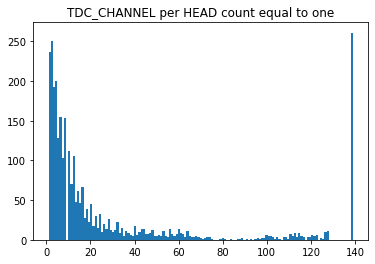

In [98]:
#7
f1_df = df[df['FPGA']==1]
plt.hist(f1_df['TDC_CHANNEL'], bins= f1_df['TDC_CHANNEL'].max())
plt.title('TDC_CHANNEL per HEAD count equal to one');

Text(0.5, 1.0, 'TDC_CHANNEL per HEAD count zero')

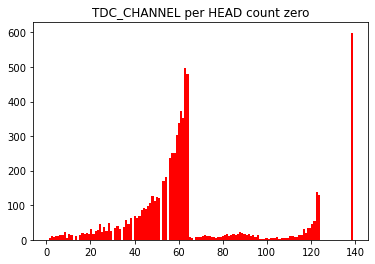

In [96]:
f0_df = df.loc[df['FPGA']==0]
plt.hist(f0_df['TDC_CHANNEL'], bins= f0_df['TDC_CHANNEL'].max(), color='r');
plt.title('TDC_CHANNEL per  HEAD count equal to zero');

In [75]:
#8
df1 = df.groupby('TDC_CHANNEL').sum('max')
print(f"The TDC_CHANNEL  with most counts are:\n{df1['HEAD'].nlargest(3)}")

The TDC_CHANNEL  with most counts are:
TDC_CHANNEL
139    108
63      56
64      50
Name: HEAD, dtype: int32


In [73]:
#9
df_uni = df['ORBIT_CNT'].unique()
df_uni_139 = df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].unique()
print(f"The number of unique orbits is: {len(df_uni)}")
print(f"The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is: {len(df_uni_139)}")

The number of unique orbits is: 101
The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is: 101
